In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns
import scipy.stats as stats

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

In [2]:
df_raw = pd.read_csv('data/competency.csv')
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [3]:
# 데이터 분리 ( Y, Xs) ->  설명변수를 이용한 주성분 분석
# y : 주성분 회귀분석의 목표변수
df_raw_x = df_raw.drop('EVAL', axis = 1)
df_raw_y = df_raw['EVAL']

In [5]:
df_raw_y.head()

0    43
1    63
2    71
3    61
4    81
Name: EVAL, dtype: int64

In [6]:
df_raw_x.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,51,30,39,61,92,45
1,64,51,54,63,73,47
2,70,68,69,76,86,48
3,63,45,47,54,84,35
4,78,56,66,71,83,47


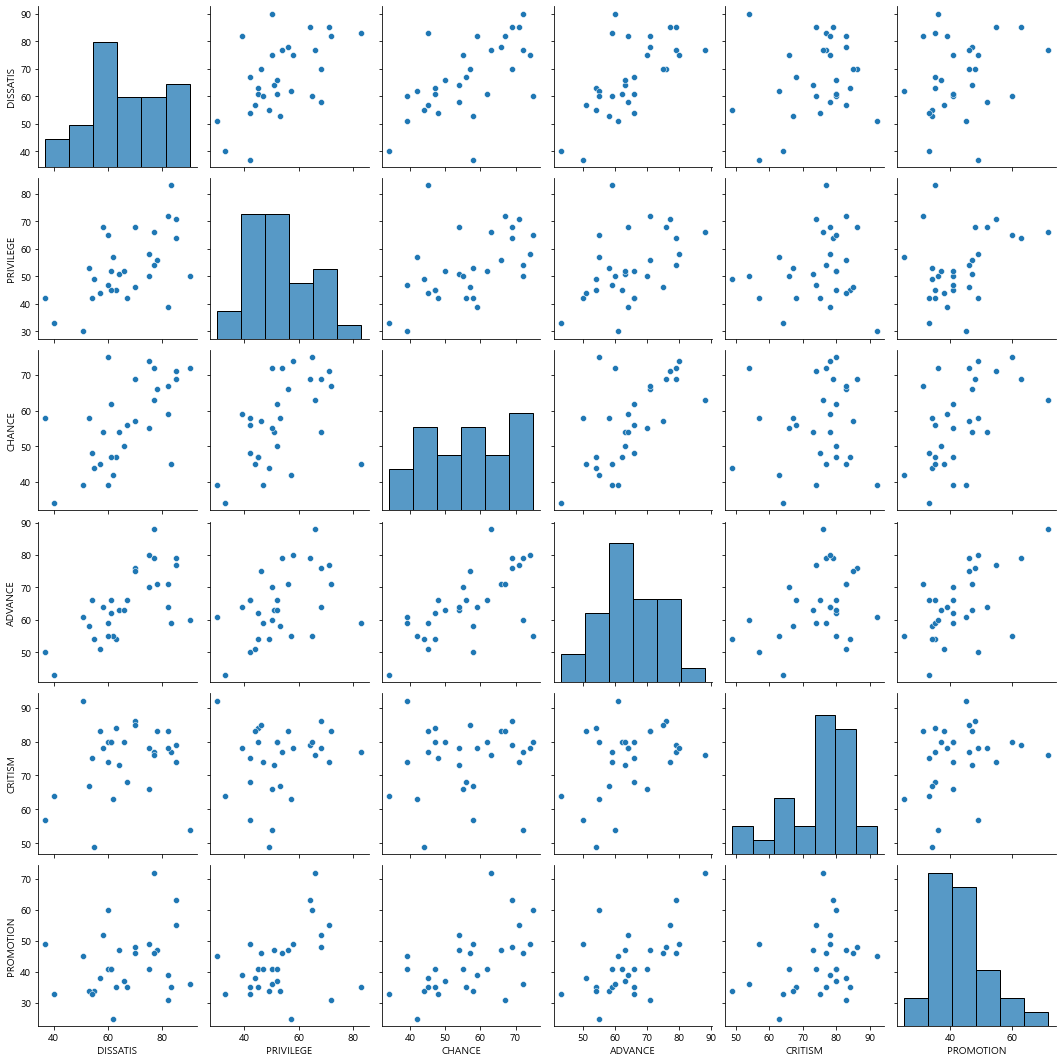

In [7]:
# 선형 관계 확인

sns.pairplot(df_raw_x)


In [8]:
# pearson 상관계수
df_raw_x.corr().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
DISSATIS,1.000,0.558,0.597,0.669,0.188,0.225
PRIVILEGE,0.558,1.000,0.493,0.445,0.147,0.343
CHANCE,0.597,0.493,1.000,0.640,0.116,0.532
ADVANCE,0.669,0.445,0.640,1.000,0.377,0.574
CRITISM,0.188,0.147,0.116,0.377,1.000,0.283
PROMOTION,0.225,0.343,0.532,0.574,0.283,1.000


In [9]:
# 데이터 확인 및 scaling

df_raw_x.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,66.600,53.133,56.367,64.633,74.767,42.933
std,13.315,12.235,11.737,10.397,9.895,10.289
min,37.000,30.000,34.000,43.000,49.000,25.000
25%,58.500,45.000,47.000,58.250,69.250,35.000
50%,65.000,51.500,56.500,63.500,77.500,41.000
75%,77.000,62.500,66.750,71.000,80.000,47.750
max,90.000,83.000,75.000,88.000,92.000,72.000


In [10]:
x_cols = df_raw_x.columns

In [13]:
# scale 변환
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)

print('scaled data \n', nd_scaled[:5].round(3))
print('shape \n', nd_scaled.shape)

scaled data 
 [[-1.192 -1.923 -1.505 -0.355  1.771  0.204]
 [-0.199 -0.177 -0.205 -0.16  -0.182  0.402]
 [ 0.26   1.236  1.095  1.112  1.155  0.501]
 [-0.275 -0.676 -0.812 -1.04   0.949 -0.784]
 [ 0.871  0.238  0.835  0.623  0.846  0.402]]
shape 
 (30, 6)


In [14]:
# data frame으로 저장

df_scaled = pd.DataFrame(nd_scaled, columns = x_cols)
df_scaled.head().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,-1.192,-1.923,-1.505,-0.355,1.771,0.204
1,-0.199,-0.177,-0.205,-0.160,-0.182,0.402
2,0.260,1.236,1.095,1.112,1.155,0.501
3,-0.275,-0.676,-0.812,-1.040,0.949,-0.784
4,0.871,0.238,0.835,0.623,0.846,0.402


In [15]:
df_scaled.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.000,-0.000,-0.000,-0.000,0.000,0.000
std,1.017,1.017,1.017,1.017,1.017,1.017
min,-2.261,-1.923,-1.938,-2.116,-2.649,-1.773
25%,-0.619,-0.676,-0.812,-0.624,-0.567,-0.784
50%,-0.122,-0.136,0.012,-0.111,0.281,-0.191
75%,0.794,0.779,0.900,0.623,0.538,0.476
max,1.787,2.483,1.615,2.286,1.771,2.873


### 주성분 분석

In [16]:
# 주성분1(Prin1) ~ (Prin6) 생성 및 저장

pca = PCA(n_components=6)
nd_pca = pca.fit_transform(df_scaled)

# 생성된 주성분 점수 확인

print('PCA data \n', nd_pca[:5])
print('shape \n', nd_pca.shape)

PCA data 
 [[ 1.67606983 -2.73856419 -0.12843595 -0.50321261  0.24330658  0.22576117]
 [ 0.21834397 -0.12615302  0.43115839  0.08726221  0.19566103  0.1941439 ]
 [-2.10515127 -0.51500683 -0.27683087  0.49131136 -0.44691698 -0.63174369]
 [ 1.35994032 -0.86064574 -0.91799066  0.03173793 -0.40137177  0.44095403]
 [-1.5120347  -0.35277019 -0.32684445 -0.32877858 -0.32709718  0.21246099]]
shape 
 (30, 6)


In [17]:
# 주성분 분석 및 결과: 주성분 점수

df_pca = pd.DataFrame(nd_pca, columns = ['Prin1', 'Prin2', 'Prin3', 'Prin4', 'Prin5', 'Prin6'])

df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,-1.191662,-1.923006,-1.504945,-0.355426,1.771410,0.204301,1.676070,-2.738564,-0.128436,-0.503213,0.243307,0.225761
1,-0.198610,-0.177338,-0.205088,-0.159779,-0.181595,0.402012,0.218344,-0.126153,0.431158,0.087262,0.195661,0.194144
2,0.259721,1.235822,1.094768,1.111930,1.154672,0.500868,-2.105151,-0.515007,-0.276831,0.491311,-0.446917,-0.631744
3,-0.274999,-0.676100,-0.811688,-1.040192,0.949092,-0.784254,1.359940,-0.860646,-0.917991,0.031738,-0.401372,0.440954
4,0.870830,0.238298,0.834797,0.622811,0.846302,0.402012,-1.512035,-0.352770,-0.326844,-0.328779,-0.327097,0.212461


In [18]:
# 주성분 분석 및 결과: 고유값 확인 및 주성분 개수 결정

df_pca_stat = pd.DataFrame()
df_pca_stat['PrinNo'] = [i for i in range(1, 7)]
df_pca_stat['EigenValues'] = pca.explained_variance_
df_pca_stat['EigenValueRatio'] = pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio'] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,3.279,0.528,0.528
1,2,1.041,0.168,0.696
2,3,0.789,0.127,0.823
3,4,0.572,0.092,0.915
4,5,0.328,0.053,0.968
5,6,0.198,0.032,1.000


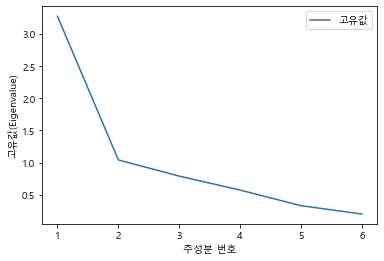

In [19]:
# 주성분 분석 및 결과: Scree plot 확인 및 주성분 개수 결정

plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValues'], label = '고유값')
plt.ylabel('고유값(Eigenvalue)')
plt.xlabel('주성분 번호')
plt.legend(loc = 'best')

In [20]:
# 2에서 꺾임

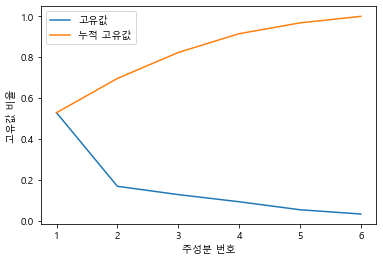

In [21]:
# 고유값 비율 그래프 생성

plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValueRatio'], label = '고유값')

plt.plot(df_pca_stat['PrinNo'], df_pca_stat['CumEigenValueRatio'], label = '누적 고유값')
plt.ylabel('고유값 비율')
plt.xlabel('주성분 번호')
plt.legend(loc = 'best')

In [22]:
# 주성분 분석 및 결과: 고유 벡터 확인 및 해석

x_cols = pd.DataFrame({'Feature': df_raw_x.columns})

df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1, columns = ['Prin1', 'Prin2', 'Prin3', 'Prin4', 'Prin5', 'Prin6'])], axis = 1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,DISSATIS,0.439,-0.313,0.445,0.316,-0.192,-0.612
1,PRIVILEGE,0.395,-0.309,0.217,-0.815,-0.038,0.190
2,CHANCE,0.461,-0.217,-0.272,0.225,0.776,0.118
3,ADVANCE,0.493,0.116,0.006,0.365,-0.460,0.631
4,CRITISM,0.225,0.802,0.457,-0.100,0.289,-0.058
5,PROMOTION,0.381,0.321,-0.687,-0.206,-0.255,-0.416


In [23]:
# pc1 점수 = 0.439 DISSATIS + 0.395 PRIVILEGE + ... 

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,0.0,-0.0,-0.0,0.0,0.0
Prin2,0.0,1.0,0.0,-0.0,0.0,0.0
Prin3,-0.0,0.0,1.0,0.0,-0.0,-0.0
Prin4,-0.0,-0.0,0.0,1.0,0.0,-0.0
Prin5,0.0,0.0,-0.0,0.0,1.0,0.0
Prin6,0.0,0.0,-0.0,-0.0,0.0,1.0


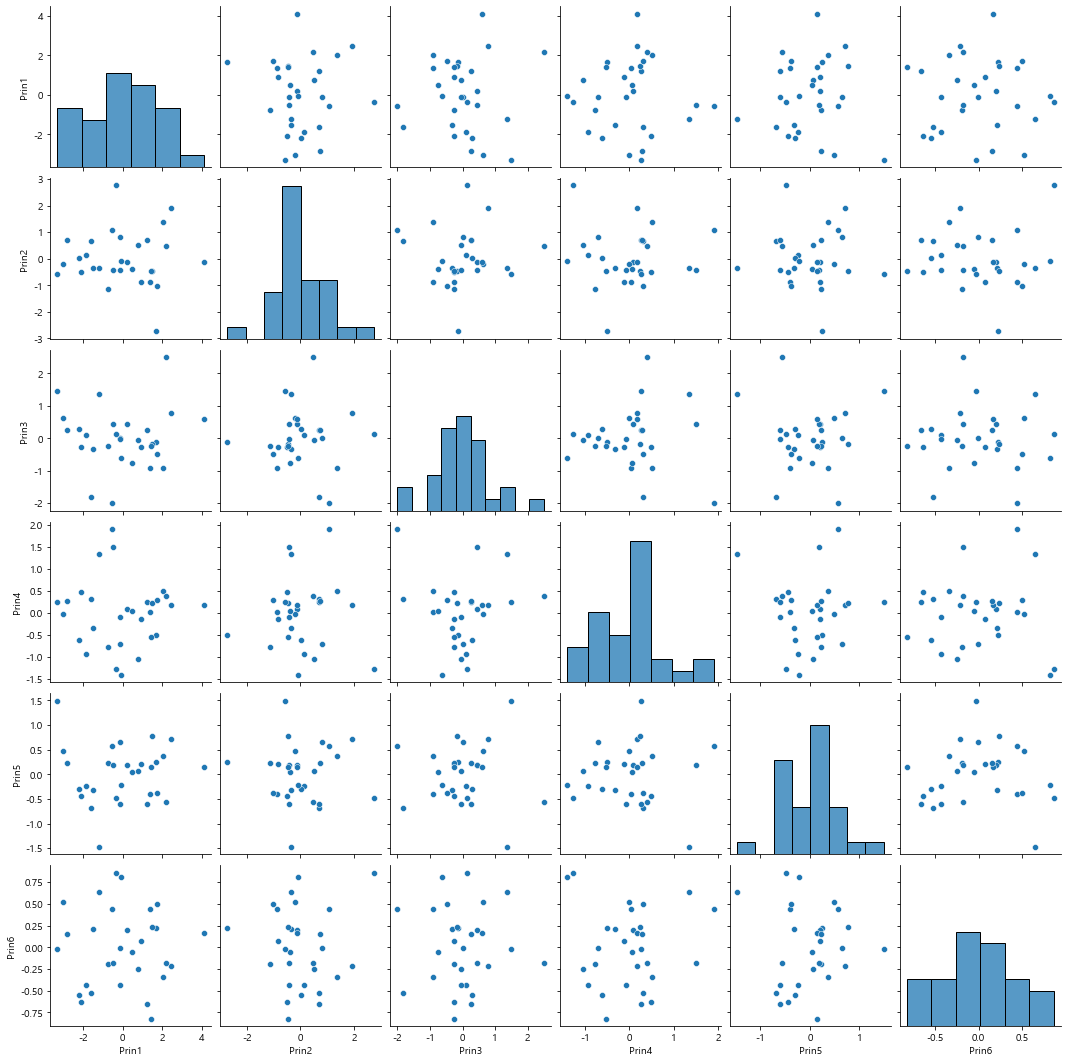

In [24]:
# 주성분 상관/ 회귀분석 : 상관관계

# 산점도 행렬
sns.pairplot(df_pca)

# 상관계수
df_pca.corr().round(3)

In [25]:
# 주성분은 서로 독립적, 상관계수 = 0

In [26]:
# 다중 선형 회귀 분ㄴ석: 원천 데이터 사용

# 원천 데이터에 절편(const) 추가
df_raw_x_const = sm.add_constant(df_raw_x)

# 회귀 모델 생성
reg_model = sm.OLS(df_raw_y, df_raw_x_const)

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [28]:
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           1.24e-05
Time:                        13:30:39   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7871     11.589      0.931      0.3

In [30]:
# 다중 선형 회귀 분ㄴ석: 스케일 변환 데이터 사용

df_scaled_const = sm.add_constant(df_scaled)
reg_model = sm.OLS(df_raw_y, df_scaled_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           1.24e-05
Time:                        13:33:00   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.290     50.087      0.0

In [31]:
# 다중선형 주성분 회귀분석 : 주성분 점수(score) 데이터 활용
# Eigenvalue, Scree plot 기준으로 적정 주성분 선택

x_var = ['Prin1', 'Prin2', 'Prin3']

# 선택된 주성분 점수 데이터에 절편(const) 컬럼 추가
df_pca_const = sm.add_constant(df_pca[x_var])

reg_model = sm.OLS(df_raw_y, df_pca_const)

reg_model = reg_model.fit()

print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     14.36
Date:                Mon, 07 Feb 2022   Prob (F-statistic):           1.02e-05
Time:                        13:38:46   Log-Likelihood:                -102.38
No. Observations:                  30   AIC:                             212.8
Df Residuals:                      26   BIC:                             218.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.440     44.890      0.0

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# 실습

In [32]:
df_iris = pd.read_csv('data/IRIS.csv')
df_iris.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
df_iris['SPECIES'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [34]:
df_iris_x = df_iris.drop(columns = 'SPECIES')
df_iris_y = df_iris['SPECIES']

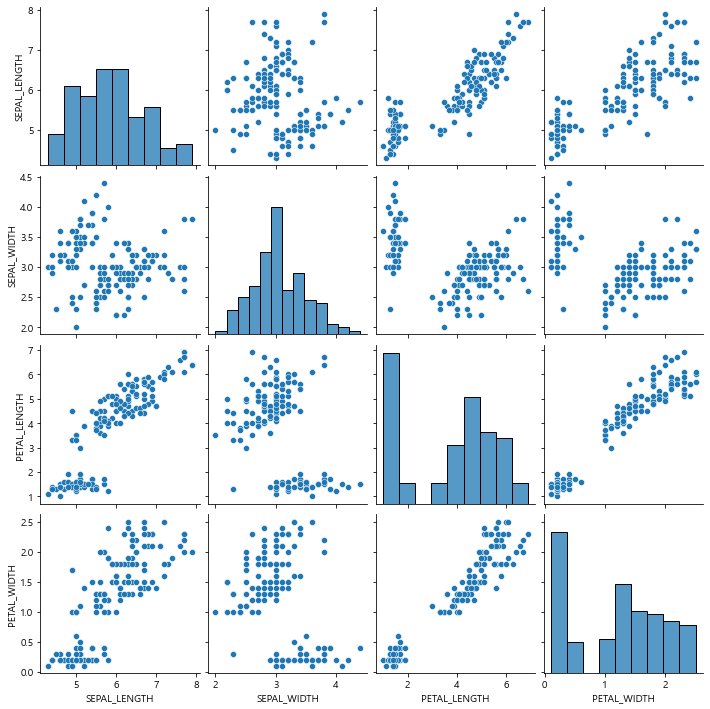

In [36]:
sns.pairplot(df_iris_x)

In [37]:
# pearson 상관계수
df_iris_x.corr().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
SEPAL_LENGTH,1.000,-0.118,0.872,0.818
SEPAL_WIDTH,-0.118,1.000,-0.428,-0.366
PETAL_LENGTH,0.872,-0.428,1.000,0.963
PETAL_WIDTH,0.818,-0.366,0.963,1.000


In [38]:
# 데이터 확인 및 scaling

df_iris_x.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,5.843,3.057,3.758,1.199
std,0.828,0.436,1.765,0.762
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


In [39]:
x_iris_cols = df_iris_x.columns

In [40]:
# scale 변환
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_iris_x)

print('scaled data \n', nd_scaled[:5].round(3))
print('shape \n', nd_scaled.shape)

scaled data 
 [[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]]
shape 
 (150, 4)


In [41]:
# data frame으로 저장

df_scaled = pd.DataFrame(nd_scaled, columns = x_iris_cols)
df_scaled.head().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,-0.901,1.019,-1.340,-1.315
1,-1.143,-0.132,-1.340,-1.315
2,-1.385,0.328,-1.397,-1.315
3,-1.507,0.098,-1.283,-1.315
4,-1.022,1.249,-1.340,-1.315


In [42]:
df_scaled.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,-0.000,-0.000,-0.000,-0.000
std,1.003,1.003,1.003,1.003
min,-1.870,-2.434,-1.568,-1.447
25%,-0.901,-0.592,-1.227,-1.184
50%,-0.053,-0.132,0.336,0.133
75%,0.675,0.559,0.763,0.791
max,2.492,3.091,1.786,1.712


### 주성분 분석

In [43]:
# 주성분1(Prin1) ~ (Prin4) 생성 및 저장

pca = PCA(n_components=4)
nd_pca = pca.fit_transform(df_scaled)

# 생성된 주성분 점수 확인

print('PCA data \n', nd_pca[:5])
print('shape \n', nd_pca.shape)

PCA data 
 [[-2.26470281  0.4800266  -0.12770602 -0.0241682 ]
 [-2.08096115 -0.67413356 -0.23460885 -0.10300677]
 [-2.36422905 -0.34190802  0.04420148 -0.02837705]
 [-2.29938422 -0.59739451  0.09129011  0.06595556]
 [-2.38984217  0.64683538  0.0157382   0.03592281]]
shape 
 (150, 4)


In [44]:
# 주성분 분석 및 결과: 주성분 점수

df_pca = pd.DataFrame(nd_pca, columns = ['Prin1', 'Prin2', 'Prin3', 'Prin4'])

df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,Prin1,Prin2,Prin3,Prin4
0,-0.900681,1.019004,-1.340227,-1.315444,-2.264703,0.480027,-0.127706,-0.024168
1,-1.143017,-0.131979,-1.340227,-1.315444,-2.080961,-0.674134,-0.234609,-0.103007
2,-1.385353,0.328414,-1.397064,-1.315444,-2.364229,-0.341908,0.044201,-0.028377
3,-1.506521,0.098217,-1.283389,-1.315444,-2.299384,-0.597395,0.091290,0.065956
4,-1.021849,1.249201,-1.340227,-1.315444,-2.389842,0.646835,0.015738,0.035923


In [45]:
# 주성분 분석 및 결과: 고유값 확인 및 주성분 개수 결정

df_pca_stat = pd.DataFrame()
df_pca_stat['PrinNo'] = [i for i in range(1, 5)]
df_pca_stat['EigenValues'] = pca.explained_variance_
df_pca_stat['EigenValueRatio'] = pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio'] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,2.938,0.730,0.730
1,2,0.920,0.229,0.958
2,3,0.148,0.037,0.995
3,4,0.021,0.005,1.000


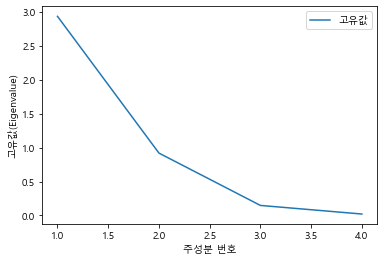

In [46]:
# 주성분 분석 및 결과: Scree plot 확인 및 주성분 개수 결정

plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValues'], label = '고유값')
plt.ylabel('고유값(Eigenvalue)')
plt.xlabel('주성분 번호')
plt.legend(loc = 'best')

In [20]:
# 2에서 꺾임

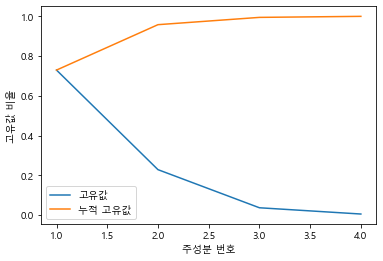

In [47]:
# 고유값 비율 그래프 생성

plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValueRatio'], label = '고유값')

plt.plot(df_pca_stat['PrinNo'], df_pca_stat['CumEigenValueRatio'], label = '누적 고유값')
plt.ylabel('고유값 비율')
plt.xlabel('주성분 번호')
plt.legend(loc = 'best')

In [48]:
# 주성분 분석 및 결과: 고유 벡터 확인 및 해석

x_cols = pd.DataFrame({'Feature': df_iris_x.columns})

df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1, columns = ['Prin1', 'Prin2', 'Prin3', 'Prin4'])], axis = 1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4
0,SEPAL_LENGTH,-0.521,-0.377,0.720,0.261
1,SEPAL_WIDTH,0.269,-0.923,-0.244,-0.124
2,PETAL_LENGTH,-0.580,-0.024,-0.142,-0.801
3,PETAL_WIDTH,-0.565,-0.067,-0.634,0.524


,Prin1,Prin2,Prin3,Prin4
Prin1,1.0,0.0,0.0,-0.0
Prin2,0.0,1.0,-0.0,-0.0
Prin3,0.0,-0.0,1.0,-0.0
Prin4,-0.0,-0.0,-0.0,1.0


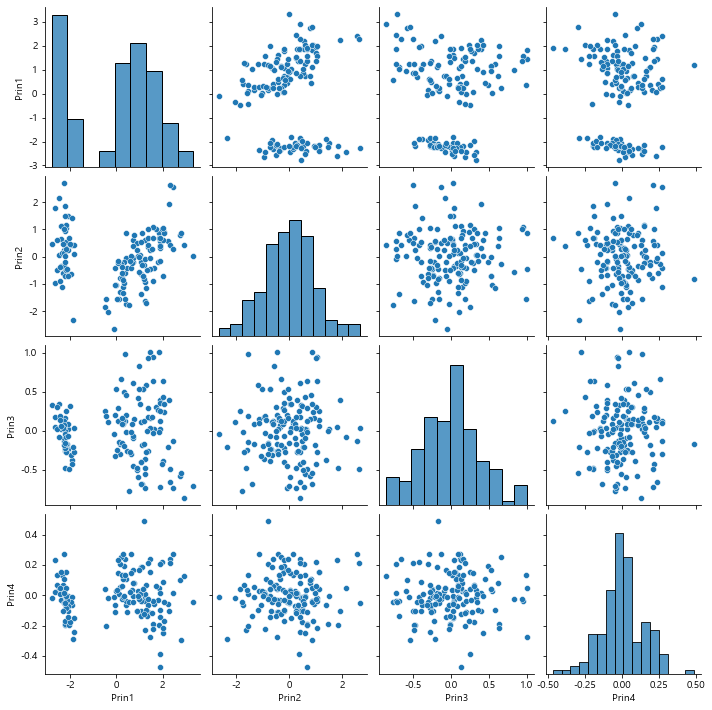

In [49]:
# 주성분 상관/ 회귀분석 : 상관관계

# 산점도 행렬
sns.pairplot(df_pca)

# 상관계수
df_pca.corr().round(3)

In [25]:
# 주성분은 서로 독립적, 상관계수 = 0

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
df_pca

,Prin1,Prin2,Prin3,Prin4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257
146,1.564580,-0.896687,-0.026371,-0.220192
147,1.521170,0.269069,0.180178,-0.119171
148,1.372788,1.011254,0.933395,-0.026129


In [64]:
# 로지스틱 선형 회귀: 스케일링 활용

log_model = LogisticRegression()
df_iris_x = df_pca
log_model = log_model.fit(df_scaled, df_iris_y)
print(log_model.score(df_scaled, df_iris_y))

0.9733333333333334


In [65]:
# 로지스틱 선형 회귀: 주성분 데이터 활용

log_model = LogisticRegression()
df_pca_iris = df_pca[['Prin1', 'Prin2']]
log_model = log_model.fit(df_pca_iris, df_iris_y)
print(log_model.score(df_pca_iris, df_iris_y))

0.9333333333333333


In [67]:
# 주성분 분석: 정보 손실 때문에 성능은 떨어지지만....

# MNIST 손글씨 분류 실습 

In [68]:
x_train = np.load('data/X_train.npy')
x_test = np.load('data/X_test.npy')
y_train = np.load('data/Y_train.npy')
y_test = np.load('data/Y_test.npy')

print('x_train_shape:', x_train.shape)
print('x_test_shape:', x_test.shape)
print('y_train_shape:', y_train.shape)
print('y_test_shape:', y_test.shape)

x_train_shape: (60000, 784)
x_test_shape: (10000, 784)
y_train_shape: (60000,)
y_test_shape: (10000,)


In [70]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [71]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### 주성분 분석

In [73]:
# 주성분1(Prin1) ~ (Prin6) 생성 및 저장

pca = PCA(n_components=784)
nd_pca = pca.fit_transform(x_train)

# 생성된 주성분 점수 확인

print('PCA data \n', nd_pca[:5])
print('shape \n', nd_pca.shape)

PCA data 
 [[ 4.86010152e-01 -1.22617358e+00 -9.61335363e-02 ...  0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 3.96752304e+00 -1.15630211e+00  2.33858651e+00 ...  7.50865969e-15
  -2.89284204e-15 -3.70144446e-15]
 [-2.03331796e-01  1.53793393e+00 -7.39253919e-01 ...  6.31622410e-16
  -4.16971875e-16  1.03408020e-15]
 [-3.13383152e+00 -2.38116556e+00  1.07314212e+00 ...  2.47525381e-15
  -3.82480220e-15 -1.14984861e-15]
 [-1.50099977e+00  2.86487399e+00  6.41323412e-02 ... -1.82938340e-16
  -5.66262069e-15 -1.25271574e-15]]
shape 
 (60000, 784)


In [80]:
# 주성분 분석 및 결과: 주성분 점수
prin = list(range(1, 785))
df_pca = pd.DataFrame(nd_pca, columns = prin)
df_pca

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.486010,-1.226174,-0.096134,-2.179443,-0.107046,-0.911672,0.917630,0.626665,-1.425549,0.778149,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.269070e-14,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00
1,3.967523,-1.156302,2.338587,-1.806926,-3.244217,-0.713531,-0.176551,-0.411645,0.158663,0.592035,...,1.084488e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.361090e-16,-1.127945e-15,7.508660e-15,-2.892842e-15,-3.701444e-15
2,-0.203332,1.537934,-0.739254,2.043182,-1.202670,-0.007197,-3.368813,1.445458,-0.449200,-0.700032,...,-2.195077e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.441559e-17,4.857003e-15,6.316224e-16,-4.169719e-16,1.034080e-15
3,-3.133832,-2.381166,1.073142,0.415209,-0.007268,2.743744,-1.857699,-0.264007,1.187181,0.043574,...,6.768655e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.781472e-16,-1.247908e-15,2.475254e-15,-3.824802e-15,-1.149849e-15
4,-1.501000,2.864874,0.064132,-0.947833,0.384946,0.169528,-0.359477,-1.590411,0.884321,0.408283,...,-8.035897e-18,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.485748e-16,-1.185999e-14,-1.829383e-16,-5.662621e-15,-1.252716e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.390674,-1.150885,0.533099,-1.361271,1.193239,0.929388,-1.955119,-0.931823,-1.940776,1.256215,...,1.179896e-17,-3.793526e-18,-2.695780e-18,1.177494e-18,2.025523e-17,-2.505668e-17,-7.279741e-18,9.291331e-18,-2.646999e-18,-3.055191e-18
59996,0.599050,-2.697646,-0.348755,-2.549074,0.778069,0.724596,-1.910352,1.981700,-2.623009,0.106366,...,9.517400e-18,1.453782e-17,-1.053638e-17,-5.079643e-18,5.996856e-18,1.289936e-17,-1.978179e-17,-1.126620e-17,3.009878e-18,-2.386851e-18
59997,-0.698249,0.627758,-1.010247,-2.802551,-0.824765,-1.813579,-1.821706,-0.724794,-0.343233,1.051431,...,-1.915160e-17,1.137488e-17,-8.325202e-18,4.881631e-18,5.037102e-18,-3.288816e-17,-2.188180e-17,-1.357706e-18,2.459461e-18,-3.427097e-18
59998,0.512181,-0.021929,2.015132,1.343936,-2.043788,-2.119820,-0.421084,0.551878,-0.064689,-0.368007,...,9.574884e-19,4.219710e-18,-1.179492e-17,-5.364929e-18,-5.867365e-19,6.232353e-18,-3.042221e-18,-1.079060e-17,6.117684e-18,1.111044e-17


In [105]:
# 주성분 분석 및 결과: 고유값 확인 및 주성분 개수 결정

df_pca_stat = pd.DataFrame()
df_pca_stat['PrinNo'] = [i for i in range(1, 785)]
df_pca_stat['EigenValues'] = pca.explained_variance_
df_pca_stat['EigenValueRatio'] = pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio'] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.head(15).round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,5.117,0.097,0.097
1,2,3.741,0.071,0.168
2,3,3.253,0.062,0.230
3,4,2.842,0.054,0.284
4,5,2.567,0.049,0.332
5,6,2.274,0.043,0.375
6,7,1.725,0.033,0.408
7,8,1.521,0.029,0.437
8,9,1.456,0.028,0.465
9,10,1.243,0.024,0.488


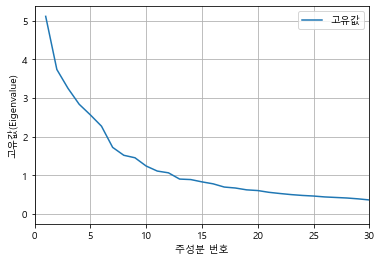

In [89]:
# 주성분 분석 및 결과: Scree plot 확인 및 주성분 개수 결정

plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValues'], label = '고유값')
plt.ylabel('고유값(Eigenvalue)')
plt.xlabel('주성분 번호')
plt.xlim([0, 30])
plt.grid()
plt.legend(loc = 'best')

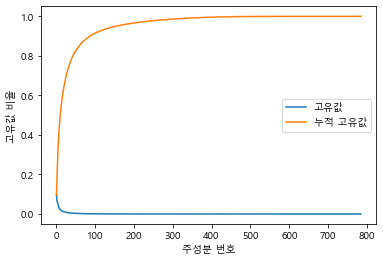

In [87]:
# 고유값 비율 그래프 생성

plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValueRatio'], label = '고유값')

plt.plot(df_pca_stat['PrinNo'], df_pca_stat['CumEigenValueRatio'], label = '누적 고유값')
plt.ylabel('고유값 비율')
plt.xlabel('주성분 번호')
plt.legend(loc = 'best')

In [92]:
# 15 차원으로 줄여서 

log_reg = LogisticRegression()
df_pca_15 = df_pca[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]
log_reg.fit(df_pca_15, y_train)

print('학습용 데이터의 정확도: ', log_reg.score(df_pca_15, y_train))

학습용 데이터의 정확도:  0.8405333333333334


In [101]:
test_nd_pca = pca.transform(x_test)

In [103]:
prin = list(range(1, 785))
df_pca_test = pd.DataFrame(test_nd_pca, columns = prin)
df_pca_test.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,-1.303024,2.932544,-0.168019,-1.220290,-1.942593,0.950480,1.540808,1.846061,-1.565667,-0.729921,...,-4.948295e-23,0.0,0.0,0.0,0.0,-1.858304e-17,-7.627231e-16,-5.109877e-16,-1.359757e-15,2.486339e-16
1,0.081165,-3.747391,-0.598884,1.563441,-0.199872,-1.844914,1.095494,0.907457,0.577041,-0.342122,...,-7.590662e-23,0.0,0.0,0.0,0.0,1.077018e-17,-7.089719e-16,9.457490e-17,6.775799e-17,-8.905181e-17
2,-3.709909,-1.689581,0.259515,1.020010,-2.094486,0.344648,-0.094185,-0.431249,0.387266,-0.532560,...,-2.276068e-23,0.0,0.0,0.0,0.0,-4.126281e-19,1.078168e-16,1.931255e-16,-7.145672e-16,6.000800e-16
3,4.838851,0.442904,0.995332,-0.385306,-0.817987,-1.903991,2.727852,0.299095,0.084018,-0.205476,...,-7.560678e-23,0.0,0.0,0.0,0.0,-2.454118e-18,8.346749e-16,-1.464489e-17,1.139134e-15,4.847199e-17
4,0.742267,2.802280,-1.144749,2.475796,-0.585875,0.880709,-1.942805,0.929213,-1.338313,0.763482,...,4.844508e-23,0.0,0.0,0.0,0.0,4.513091e-18,1.031598e-16,-9.113168e-16,-1.398730e-15,-9.946600e-16


In [104]:
df_pca_15_test = df_pca_test[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]
print('평가용 데이터의 정확도: ', log_reg.score(df_pca_15_test, y_test))

평가용 데이터의 정확도:  0.8496


In [112]:
df_pca_15_test

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.303024,2.932544,-0.168019,-1.220290,-1.942593,0.950480,1.540808,1.846061,-1.565667,-0.729921,0.764252,-0.433167,0.131534,-0.863313,-0.541277
1,0.081165,-3.747391,-0.598884,1.563441,-0.199872,-1.844914,1.095494,0.907457,0.577041,-0.342122,0.742314,0.130708,-0.007941,-3.262432,-0.039196
2,-3.709909,-1.689581,0.259515,1.020010,-2.094486,0.344648,-0.094185,-0.431249,0.387266,-0.532560,-0.227050,-0.328076,-0.699686,1.195858,-1.196481
3,4.838851,0.442904,0.995332,-0.385306,-0.817987,-1.903991,2.727852,0.299095,0.084018,-0.205476,-2.042770,-0.914257,-0.340450,-0.444931,-1.486771
4,0.742267,2.802280,-1.144749,2.475796,-0.585875,0.880709,-1.942805,0.929213,-1.338313,0.763482,0.541966,-0.830282,0.969966,0.529826,-1.092340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.185264,-2.146064,-0.145835,1.056344,3.201924,3.729902,3.101046,0.924722,-2.219372,-0.147496,-0.567093,0.115658,-0.312978,0.278187,0.834380
9996,2.257643,-2.714024,-3.215708,-0.753277,0.461028,-0.793089,2.672281,3.049552,-0.395279,-0.157701,0.670542,-0.353798,0.176272,0.866307,0.119348
9997,-1.059560,2.340667,1.392591,-1.627273,2.634249,0.638680,-0.165486,-1.382724,-0.096597,-3.147675,-0.677915,0.755219,-0.045335,0.814500,0.285625
9998,-1.231479,-0.425896,2.520940,-0.993536,-0.576975,-1.083437,0.636406,0.651211,1.059391,-0.845235,-0.004492,2.157914,1.634764,-1.768808,0.485474


In [107]:
# 주성분 20개 했을 때

df_pca_stat.head(20).round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,5.117,0.097,0.097
1,2,3.741,0.071,0.168
2,3,3.253,0.062,0.230
3,4,2.842,0.054,0.284
4,5,2.567,0.049,0.332
5,6,2.274,0.043,0.375
6,7,1.725,0.033,0.408
7,8,1.521,0.029,0.437
8,9,1.456,0.028,0.465
9,10,1.243,0.024,0.488


In [108]:
lst20 = list(range(1, 21))
df_pca_20 = df_pca[lst20]
log_reg.fit(df_pca_20, y_train)

print('학습용 데이터의 정확도: ', log_reg.score(df_pca_20, y_train))

학습용 데이터의 정확도:  0.8749166666666667


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [109]:
df_pca_20_test = df_pca_test[lst20]
print('평가용 데이터의 정확도: ', log_reg.score(df_pca_20_test, y_test))

평가용 데이터의 정확도:  0.8804


In [113]:
# predict 로 해보자
pred20 = log_reg.predict(df_pca_20_test)

In [117]:
from sklearn.metrics import accuracy_score

In [118]:
accuracy_score(pred20, y_test)

0.8804

### 또는, (고경환님 방법)
- 주성분 10개로 할 때

In [114]:
#주성분분석

pca1 = PCA(n_components=10)
nd_pca1 = pca1.fit_transform(x_train)

print('PCA Data : \n {}'.format(nd_pca1[:5]))
print('Shape : \n {}'.format(nd_pca1.shape))


PCA Data : 
 [[ 0.48601031 -1.2261766  -0.09613021 -2.17944453 -0.10704315 -0.91172992
   0.91747373  0.62599299 -1.42558814  0.78049959]
 [ 3.96752318 -1.15630619  2.33858682 -1.80691841 -3.24421799 -0.71355607
  -0.17656462 -0.41213158  0.15799785  0.5974341 ]
 [-0.20333275  1.53793829 -0.73927402  2.04311859 -1.20261486 -0.00707366
  -3.36867351  1.44652949 -0.4511634  -0.70895857]
 [-3.13383121 -2.38116753  1.07314711  0.41522942 -0.00728359  2.74371279
  -1.85775018 -0.26448627  1.18742633  0.04715796]
 [-1.50100028  2.86487466  0.06412071 -0.94786815  0.38498042  0.16957515
  -0.35942483 -1.5902487   0.88275306  0.40566924]]
Shape : 
 (60000, 10)


In [115]:
#주성분점수 저장 및 확인

df_pca1 = pd.DataFrame(nd_pca1, columns=['p1','p2','p3','p4','p5','p6','p7','p8','p9','p10'])
df_pca1
# df_scaled_pca = pd.DataFrame(x_train).join(df_pca)
# df_scaled_pca.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10
0,0.486010,-1.226177,-0.096130,-2.179445,-0.107043,-0.911730,0.917474,0.625993,-1.425588,0.780500
1,3.967523,-1.156306,2.338587,-1.806918,-3.244218,-0.713556,-0.176565,-0.412132,0.157998,0.597434
2,-0.203333,1.537938,-0.739274,2.043119,-1.202615,-0.007074,-3.368674,1.446529,-0.451163,-0.708959
3,-3.133831,-2.381168,1.073147,0.415229,-0.007284,2.743713,-1.857750,-0.264486,1.187426,0.047158
4,-1.501000,2.864875,0.064121,-0.947868,0.384980,0.169575,-0.359425,-1.590249,0.882753,0.405669
...,...,...,...,...,...,...,...,...,...,...
59995,-0.390673,-1.150884,0.533103,-1.361264,1.193231,0.929370,-1.955137,-0.931706,-1.939856,1.256110
59996,0.599050,-2.697645,-0.348763,-2.549098,0.778086,0.724638,-1.910297,1.982055,-2.623908,0.103870
59997,-0.698249,0.627759,-1.010246,-2.802535,-0.824792,-1.813517,-1.821764,-0.724071,-0.342326,1.049940
59998,0.512181,-0.021936,2.015142,1.343977,-2.043817,-2.119895,-0.421259,0.551024,-0.064431,-0.357672


In [116]:
#고유값(Eigenvalue) 확인 및 주성분 개수 결정

df_pca_stat1 = pd.DataFrame()
df_pca_stat1['PrinNo'] = list(range(1,11))
df_pca_stat1['EigenValues'] = pca1.explained_variance_
df_pca_stat1['EigenValueRatio'] = pca1.explained_variance_ratio_
df_pca_stat1['CumEigenValueRation'] = np.cumsum(pca1.explained_variance_ratio_)
df_pca_stat1.tail()

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRation
5,6,2.273663,0.043122,0.375401
6,7,1.725155,0.032719,0.408121
7,8,1.520560,0.028839,0.436959
8,9,1.456304,0.027620,0.464580
9,10,1.242738,0.023570,0.488150
